## Análisis de Componentes Principales (PCA) - Procedimiento

1. Construir la matriz X a partir del dataset, poniendo las variables en
columnas
2. Estandarizar las variables X
3. Calcular la matriz de correlaciones Sx
4. Calcular AyA
5. Ordenar los autovalores de mayor a menor
6. Construir la matriz V con los autovectores con mayor autovalor
7. Calcular las nuevas variables Y como combinación lineal de las originales

# Análisis de Componentes Principales (PCA) de Países Europeos

## Introducción
El Análisis de Componentes Principales (PCA) es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos, manteniendo la mayor cantidad de información posible. En este análisis, aplicamos PCA a un conjunto de datos de países europeos para entender las principales características que diferencian a estos países.

## Datos y Variables
Nuestro conjunto de datos incluye las siguientes variables para varios países europeos:
1. Area
2. GDP (Producto Interno Bruto)
3. Inflation (Inflación)
4. Life.expect (Expectativa de vida)
5. Military (Gasto militar)
6. Pop.growth (Crecimiento poblacional)
7. Unemployment (Desempleo)

## Proceso de Análisis

### 1. Preparación de Datos
- Cargamos los datos desde un archivo CSV.
- Seleccionamos las variables numéricas para el análisis.

### 2. Estandarización
- Estandarizamos las variables para que todas tengan media 0 y desviación estándar 1.
- Esto es crucial porque PCA es sensible a la escala de las variables.

### 3. Matriz de Correlaciones
- Calculamos la matriz de correlaciones entre las variables estandarizadas.
- Esta matriz nos muestra cómo se relacionan las variables entre sí.

### 4. Cálculo de Autovalores y Autovectores
- Calculamos los autovalores y autovectores de la matriz de correlaciones.
- Los autovalores representan la cantidad de varianza explicada por cada componente principal.
- Los autovectores representan la dirección de cada componente principal en el espacio de las variables originales.

### 5. Ordenamiento de Componentes Principales
- Ordenamos los autovalores y autovectores de mayor a menor.
- Esto nos permite identificar las componentes principales más importantes.

### 6. Cálculo de Nuevas Variables
- Calculamos las nuevas variables (componentes principales) como combinaciones lineales de las variables originales.

### 7. Visualización
- Creamos un biplot para visualizar los países y las variables en el espacio de las dos primeras componentes principales.
- Realizamos una clusterización K-means para agrupar países similares.

## Interpretación de Resultados

### Biplot
- El biplot muestra la posición de los países en las dos primeras componentes principales.
- Las flechas representan las variables originales, su longitud y dirección indican su importancia y relación con las componentes principales.


### Clusterización
- La agrupación de países en clusters nos ayuda a identificar grupos de países con características similares.

### Índice PC1
- Creamos un índice basado en la primera componente principal (PC1).

## Conclusiones

1. Interpretación de Componentes Principales:
   - La primera componente principal (PC1) captura la mayor variabilidad entre los países europeos, reflejando principalmente desviaciones extremas en indicadores económicos.
   - Un valor alto (positivo o negativo) en PC1 indica una mayor diferencia respecto a la media europea, no necesariamente un mejor desempeño económico.
   - La segunda componente principal (PC2) podría estar relacionada con factores demográficos y de mercado laboral.

2. Variabilidad entre Países:
   - El análisis revela una gran diversidad económica y social entre los países europeos.
   - Países en los extremos del PC1 (como Ucrania en el positivo, y Luxemburgo o Suiza en el negativo) representan las mayores desviaciones de la norma europea, por razones diferentes.

3. Influencia de las Variables:
   - La inflación y el desempleo tienen una fuerte influencia en la posición de los países hacia el extremo positivo de PC1.
   - El PIB y la expectativa de vida influyen en la posición hacia el extremo negativo de PC1.
   - Variables como el crecimiento poblacional y el gasto militar parecen tener menos impacto en la variabilidad principal.

4. Índice PC1:
   - El índice basado en PC1 no debe interpretarse como un simple "Índice de Desarrollo", sino como un "Índice de Divergencia Económica".
   - Valores extremos en este índice indican condiciones económicas atípicas, sean estas consideradas positivas (como alto PIB) o negativas (como alta inflación).

5. Agrupaciones de Países:
   - La clusterización revela grupos de países con características económicas y sociales similares.
   - Estos grupos podrían representar diferentes modelos o etapas de desarrollo económico dentro de Europa.

6. Casos Particulares:
   - Ucrania se destaca como un caso particular, mostrando la mayor desviación positiva en PC1, principalmente debido a su alta inflación.
   - Países como Luxemburgo y Suiza representan desviaciones negativas extremas, reflejando sus economías altamente desarrolladas y estables.


## Limitaciones y Consideraciones Futuras
- La sensibilidad del PCA a valores extremos sugiere la necesidad de considerar técnicas más robustas para futuros análisis.
- Un análisis temporal podría proporcionar insights sobre la evolución de estas diferencias económicas.
- La inclusión de más variables socioeconómicas podría ofrecer una visión más completa de las diferencias entre países.



In [ ]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargamos los datos
data = pd.read_csv('europe.csv')

# Mostramos las filas del dataset para verificar la carga
print(data)


           Country    Area    GDP  Inflation  Life.expect  Military  \
0          Austria   83871  41600        3.5        79.91      0.80   
1          Belgium   30528  37800        3.5        79.65      1.30   
2         Bulgaria  110879  13800        4.2        73.84      2.60   
3          Croatia   56594  18000        2.3        75.99      2.39   
4   Czech Republic   78867  27100        1.9        77.38      1.15   
5          Denmark   43094  37000        2.8        78.78      1.30   
6          Estonia   45228  20400        5.0        73.58      2.00   
7          Finland  338145  36000        3.3        79.41      2.00   
8          Germany  357022  38100        2.5        80.19      1.50   
9           Greece  131957  26300        3.3        80.05      4.30   
10         Hungary   93028  19600        3.9        75.02      1.75   
11         Iceland  103000  38100        4.0        81.00      0.00   
12         Ireland   70273  40800        2.6        80.32      0.90   
13    

In [ ]:
# 1. Construir la matriz X

# Seleccionamos las columnas numéricas para el análisis
numeric_columns = ['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']
X = data[numeric_columns].values

print("Forma de la matriz X:", X.shape)
print("Filas de X:")
print(X)

Forma de la matriz X: (28, 7)
Filas de X:
[[ 8.38710e+04  4.16000e+04  3.50000e+00  7.99100e+01  8.00000e-01
   3.00000e-02  4.20000e+00]
 [ 3.05280e+04  3.78000e+04  3.50000e+00  7.96500e+01  1.30000e+00
   6.00000e-02  7.20000e+00]
 [ 1.10879e+05  1.38000e+04  4.20000e+00  7.38400e+01  2.60000e+00
  -8.00000e-01  9.60000e+00]
 [ 5.65940e+04  1.80000e+04  2.30000e+00  7.59900e+01  2.39000e+00
  -9.00000e-02  1.77000e+01]
 [ 7.88670e+04  2.71000e+04  1.90000e+00  7.73800e+01  1.15000e+00
  -1.30000e-01  8.50000e+00]
 [ 4.30940e+04  3.70000e+04  2.80000e+00  7.87800e+01  1.30000e+00
   2.40000e-01  6.10000e+00]
 [ 4.52280e+04  2.04000e+04  5.00000e+00  7.35800e+01  2.00000e+00
  -6.50000e-01  1.25000e+01]
 [ 3.38145e+05  3.60000e+04  3.30000e+00  7.94100e+01  2.00000e+00
   7.00000e-02  7.80000e+00]
 [ 3.57022e+05  3.81000e+04  2.50000e+00  8.01900e+01  1.50000e+00
  -2.00000e-01  6.00000e+00]
 [ 1.31957e+05  2.63000e+04  3.30000e+00  8.00500e+01  4.30000e+00
   6.00000e-02  1.74000e+01

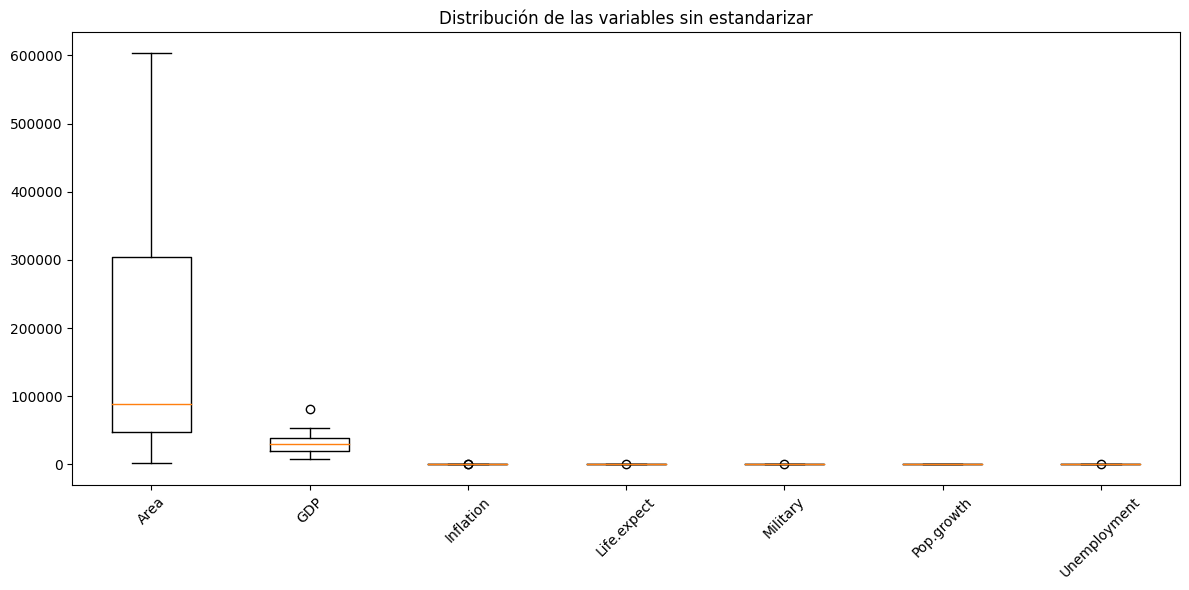

Media de las variables estandarizadas:
[ 4.16333634e-17 -3.96508223e-17 -7.93016446e-17 -5.49560397e-15
 -3.17206578e-17 -1.98254112e-17 -3.09276414e-16]

Desviación estándar de las variables estandarizadas:
[1. 1. 1. 1. 1. 1. 1.]


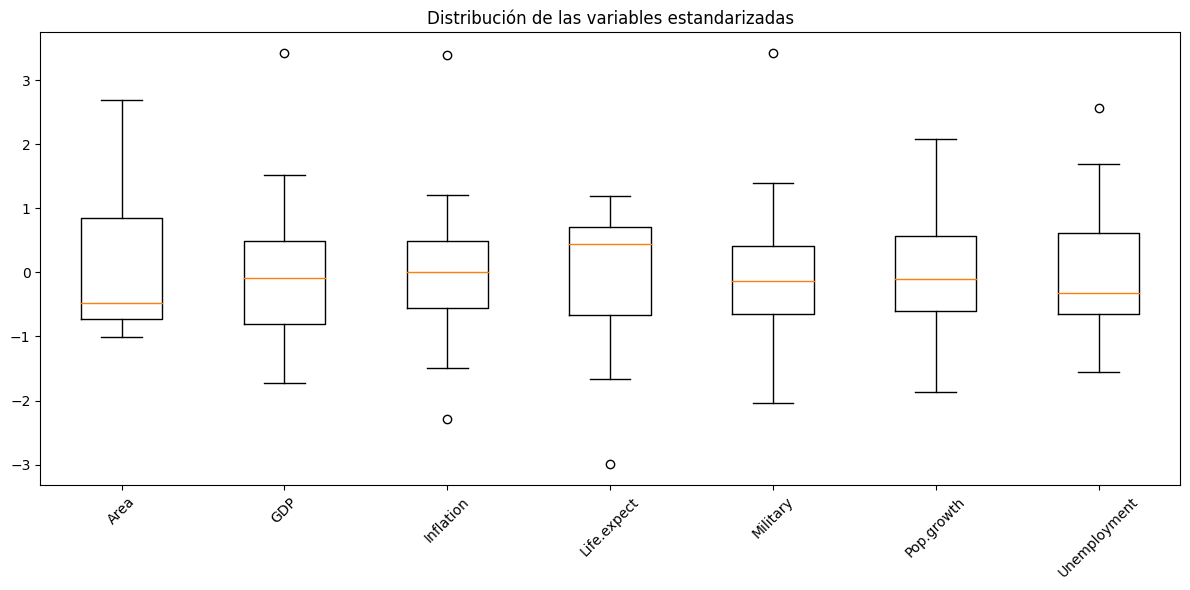

In [ ]:
# 2. Estandarizar las variables X

# Visualizamos la distribución de las variables sin estandarizar
plt.figure(figsize=(12, 6))
plt.boxplot(X)
plt.title('Distribución de las variables sin estandarizar')
plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation=45)
plt.tight_layout()
plt.show()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Media de las variables estandarizadas:")
print(X_scaled.mean(axis=0))
print("\nDesviación estándar de las variables estandarizadas:")
print(X_scaled.std(axis=0))

# Visualizamos la distribución de las variables estandarizadas
plt.figure(figsize=(12, 6))
plt.boxplot(X_scaled)
plt.title('Distribución de las variables estandarizadas')
plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation=45)
plt.tight_layout()
plt.show()

Una matriz de correlación es una tabla que muestra el coeficiente de correlación entre múltiples variables. Cada celda en esta matriz contiene el valor de correlación entre un par de variables.

* *+1: Correlación positiva perfecta.*
* *0: No hay correlación lineal.*
* *-1: Correlación negativa perfecta.*

Matriz de correlaciones Sx:


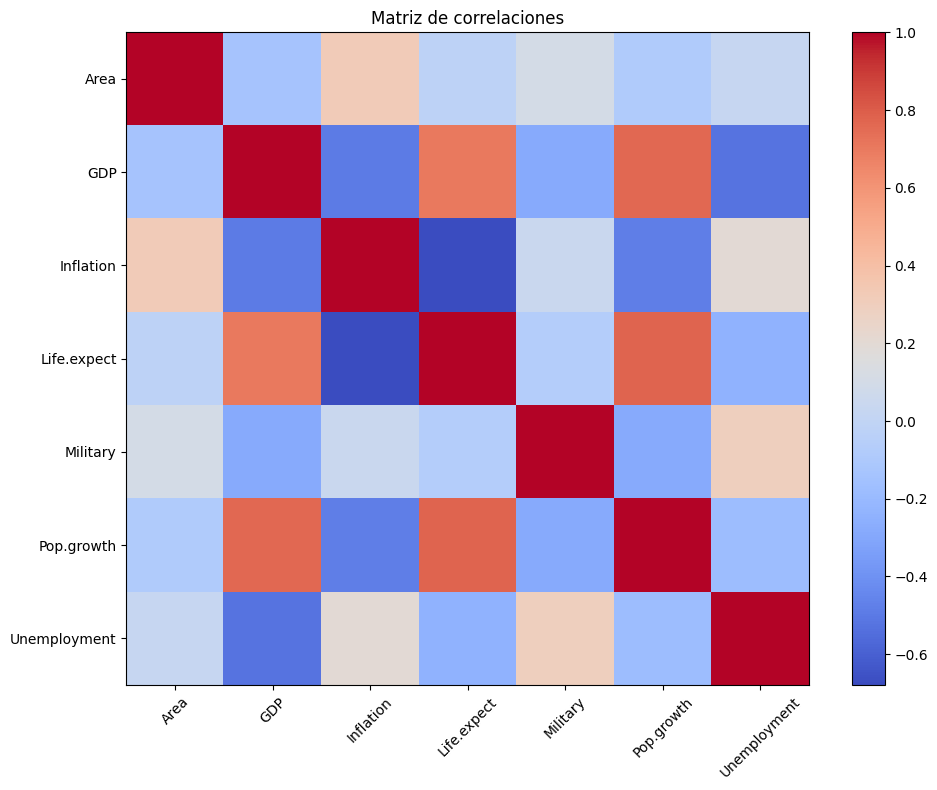

In [ ]:
# 3. Calcular la matriz de correlaciones Sx
Sx = np.corrcoef(X_scaled.T)

print("Matriz de correlaciones Sx:")
# print(Sx)

# Visualizamos la matriz de correlaciones
plt.figure(figsize=(10, 8))
plt.imshow(Sx, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Matriz de correlaciones')
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45)
plt.yticks(range(len(numeric_columns)), numeric_columns)
plt.tight_layout()
plt.show()

En esta matriz, observamos que algunas variables están correlacionadas con otras, particularmente aquellas más cercanas a 1, lo que indica una fuerte correlación positiva. Por ejemplo, el *producto bruto interno/PBI (GDP)* está positivamente correlacionado con la *esperanza de vida (Life.expect)* y el *Crecimiento Poblacional (Pop.growth)*. Estas tres variables muestran una relación positiva según la matriz de correlación.

Por otro lado, algunas variables, como el *área* con el *gasto militar (Military)* y el *área* con el *desempleo (Unemployment)*, parecen tener poca o ninguna correlación, ya que sus valores están cerca de cero.

Finalmente, vemos una correlación negativa entre *inflación (inflation)* y *Esperanza de Vida (Life.expect), así como entre el **GDP* y  *inflation, y entre **Unemployment* y el *PBI. Estas correlaciones negativas sugieren que, a medida que la Inflación aumenta, tanto el **GDP* como *Life.expect* tienden a disminuir, y un mayor *GDP* se asocia con un menor *Unemployment*.

*Dicho esto, observamos tanto correlaciones positivas como negativas entre algunas variables. Dadas estas relaciones, tiene sentido realizar un PCA (Análisis de Componentes Principales) para reducir la dimensionalidad del conjunto de datos y capturar los patrones más importantes en los datos.*

Autovalores:
[3.22716568 1.18712341 1.06319053 0.45784862 0.12564189 0.16867389
 0.77035598]

Autovectores:
[[ 1.24873902e-01 -1.72872202e-01  8.98296740e-01 -3.24016926e-01
  -6.66428246e-02  1.90118083e-01  4.48503976e-02]
 [-5.00505858e-01 -1.30139553e-01  8.39557607e-02  3.90632444e-01
   3.97408435e-01  6.38657073e-01 -8.42554739e-02]
 [ 4.06518155e-01 -3.69657243e-01  1.98194675e-01  6.89500539e-01
   2.26700295e-01 -3.23867263e-01  1.64685649e-01]
 [-4.82873325e-01  2.65247797e-01  2.46082460e-01 -1.01786561e-01
   5.07031305e-01 -6.06434187e-01  2.67714373e-02]
 [ 1.88111616e-01  6.58266888e-01  2.43679433e-01  3.68147581e-01
  -1.37309597e-01  3.55960680e-02 -5.62374796e-01]
 [-4.75703554e-01  8.26219831e-02  1.63697207e-01  3.47867772e-01
  -6.71146682e-01 -1.20855625e-01  3.92462767e-01]
 [ 2.71655820e-01  5.53203705e-01  5.00135736e-04  1.01587422e-02
   2.44662434e-01  2.59704965e-01  7.01967912e-01]]


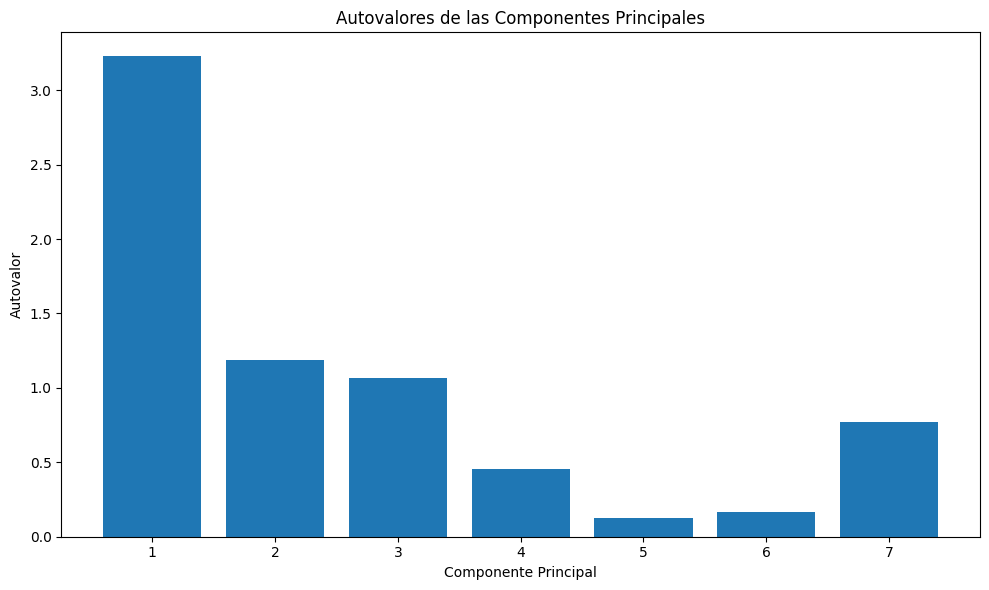

In [ ]:
# 4. Calcular los autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(Sx)

print("Autovalores:")
print(eigenvalues)
print("\nAutovectores:")
print(eigenvectors)

# Visualizamos los autovalores
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.title('Autovalores de las Componentes Principales')
plt.tight_layout()
plt.show()


Autovalores ordenados:
[3.22716568 1.18712341 1.06319053 0.77035598 0.45784862 0.16867389
 0.12564189]

Autovectores correspondientes:
[[ 1.24873902e-01 -1.72872202e-01  8.98296740e-01  4.48503976e-02
  -3.24016926e-01  1.90118083e-01 -6.66428246e-02]
 [-5.00505858e-01 -1.30139553e-01  8.39557607e-02 -8.42554739e-02
   3.90632444e-01  6.38657073e-01  3.97408435e-01]
 [ 4.06518155e-01 -3.69657243e-01  1.98194675e-01  1.64685649e-01
   6.89500539e-01 -3.23867263e-01  2.26700295e-01]
 [-4.82873325e-01  2.65247797e-01  2.46082460e-01  2.67714373e-02
  -1.01786561e-01 -6.06434187e-01  5.07031305e-01]
 [ 1.88111616e-01  6.58266888e-01  2.43679433e-01 -5.62374796e-01
   3.68147581e-01  3.55960680e-02 -1.37309597e-01]
 [-4.75703554e-01  8.26219831e-02  1.63697207e-01  3.92462767e-01
   3.47867772e-01 -1.20855625e-01 -6.71146682e-01]
 [ 2.71655820e-01  5.53203705e-01  5.00135736e-04  7.01967912e-01
   1.01587422e-02  2.59704965e-01  2.44662434e-01]]


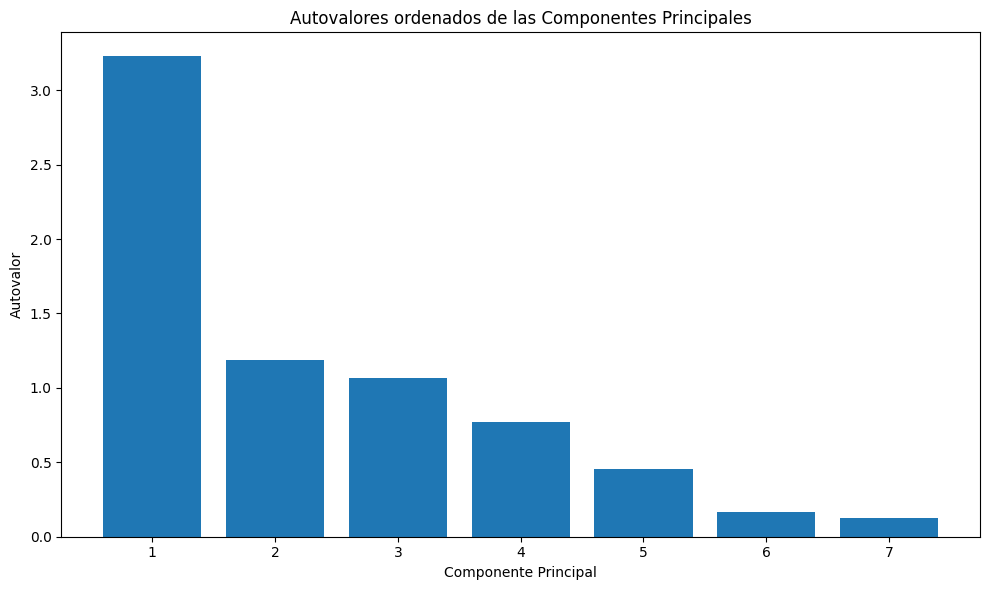

In [ ]:
# 5. Ordenar los autovalores de mayor a menor
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Autovalores ordenados:")
print(eigenvalues)
print("\nAutovectores correspondientes:")
print(eigenvectors)

# Visualizamos los autovalores ordenados
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.title('Autovalores ordenados de las Componentes Principales')
plt.tight_layout()
plt.show()


Matriz de autovectores V:
[[ 1.24873902e-01 -1.72872202e-01  8.98296740e-01  4.48503976e-02
  -3.24016926e-01  1.90118083e-01 -6.66428246e-02]
 [-5.00505858e-01 -1.30139553e-01  8.39557607e-02 -8.42554739e-02
   3.90632444e-01  6.38657073e-01  3.97408435e-01]
 [ 4.06518155e-01 -3.69657243e-01  1.98194675e-01  1.64685649e-01
   6.89500539e-01 -3.23867263e-01  2.26700295e-01]
 [-4.82873325e-01  2.65247797e-01  2.46082460e-01  2.67714373e-02
  -1.01786561e-01 -6.06434187e-01  5.07031305e-01]
 [ 1.88111616e-01  6.58266888e-01  2.43679433e-01 -5.62374796e-01
   3.68147581e-01  3.55960680e-02 -1.37309597e-01]
 [-4.75703554e-01  8.26219831e-02  1.63697207e-01  3.92462767e-01
   3.47867772e-01 -1.20855625e-01 -6.71146682e-01]
 [ 2.71655820e-01  5.53203705e-01  5.00135736e-04  7.01967912e-01
   1.01587422e-02  2.59704965e-01  2.44662434e-01]]


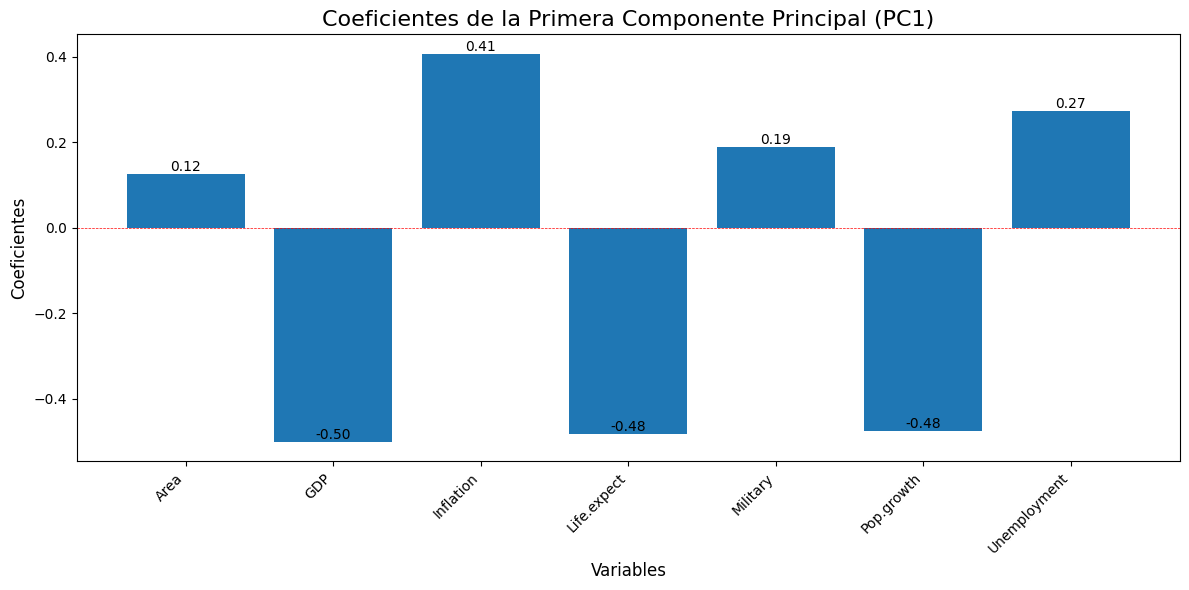


Ecuación de PC1:
PC1 = 0.12*Area + -0.50*GDP + 0.41*Inflation + -0.48*Life.expect + 0.19*Military + -0.48*Pop.growth + 0.27*Unemployment


In [ ]:
# 6. Construir la matriz de autovectores
V = eigenvectors

print("Matriz de autovectores V:")
print(V)

# 'V' es la matriz de autovectores y la primera columna corresponde a PC1
pc1_coefficients = V[:, 0]

# Nombres de las variables
variables = ['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']

# Crear el gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(variables, pc1_coefficients)

# Personalizar el gráfico
plt.title('Coeficientes de la Primera Componente Principal (PC1)', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Coeficientes', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Añadir los valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Añadir una línea horizontal en y=0
plt.axhline(y=0, color='r', linestyle='--', linewidth=0.5)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprimir la ecuación de PC1
equation = "PC1 = " + " + ".join([f"{coef:.2f}*{var}" for coef, var in zip(pc1_coefficients, variables)])
print("\nEcuación de PC1:")
print(equation)

Nuevas variables Y:
[[-1.08174766e+00 -1.27005118e+00 -5.14803203e-01 -4.13906945e-01
   1.25137101e-03 -3.81542281e-01  5.75549200e-01]
 [-6.81094069e-01 -4.16040770e-01 -6.87291926e-01 -2.83363642e-01
   2.73518188e-01 -3.79129376e-01  4.80971706e-01]
 [ 2.60987882e+00  2.69638005e-01 -6.23031078e-01 -1.33194086e+00
   1.94621796e-03  3.83193050e-03  2.51343883e-02]
 [ 1.27014885e+00  1.90142683e+00 -8.31924778e-01  3.71907033e-01
  -3.77893838e-01  4.34887518e-01 -2.99663911e-01]
 [-1.67209494e-01 -1.31943477e-01 -1.00197852e+00 -2.63449024e-01
  -1.04740907e+00  1.27807608e-01 -1.15020144e-01]]


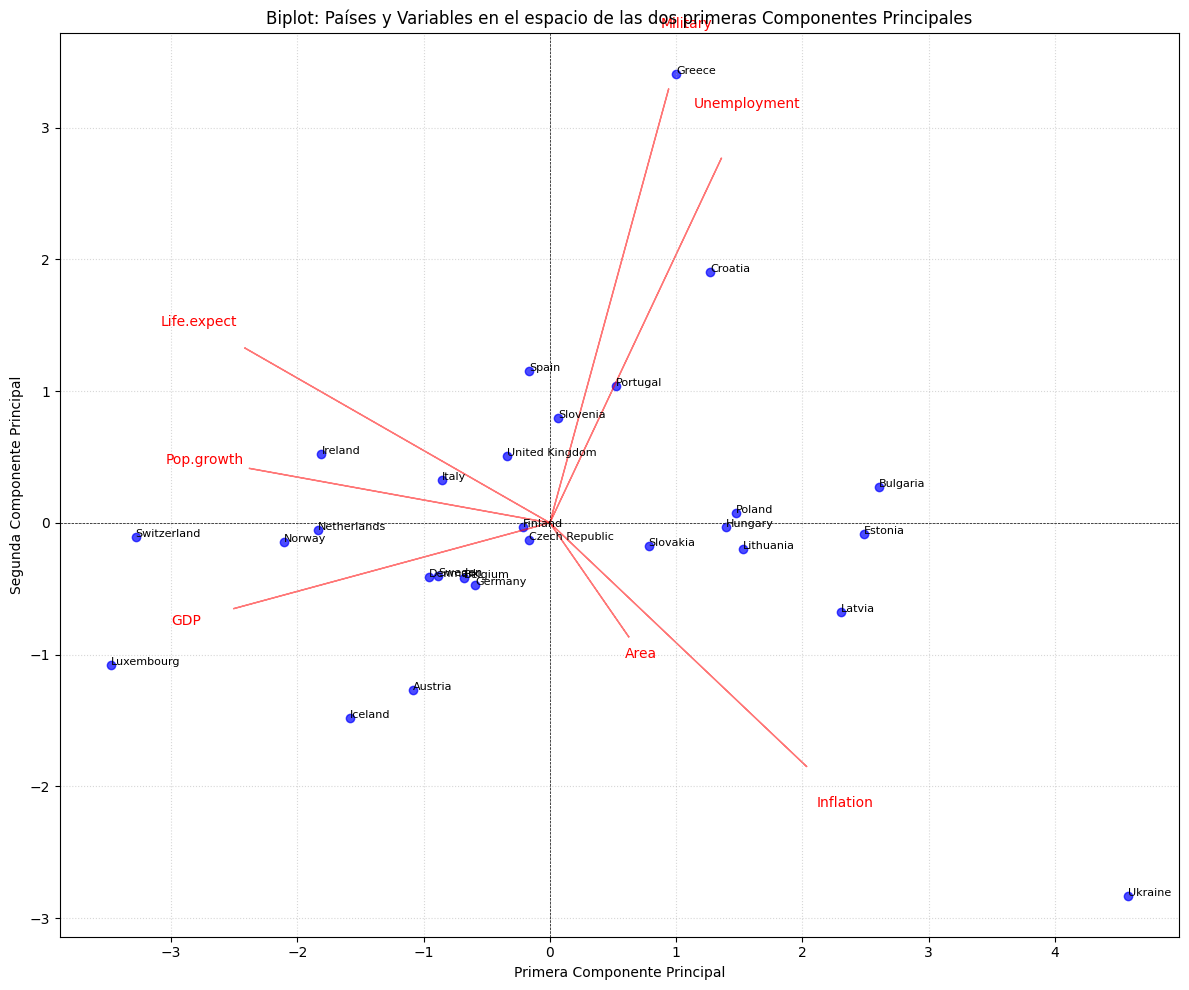


Varianza explicada por cada componente:
[0.46102367 0.16958906 0.15188436 0.11005085 0.06540695 0.02409627
 0.01794884]


In [ ]:
# 7. Calcular las nuevas variables como combinación lineal de las originales
Y = np.dot(X_scaled, V)

print("Nuevas variables Y:")
print(Y[:5])  # Mostramos las primeras 5 filas

# Visualizamos las dos primeras componentes principales y las variables como vectores (biplot)
plt.figure(figsize=(12, 10))

# Scatter plot de los países
plt.scatter(Y[:, 0], Y[:, 1], c='blue', alpha=0.7)
for i, country in enumerate(data['Country']):
    plt.annotate(country, (Y[i, 0], Y[i, 1]), fontsize=8)

# Añadimos los vectores de las variables
scalef = 5  # Factor de escala para hacer los vectores más visibles
for i in range(len(numeric_columns)):
    plt.arrow(0, 0, V[i, 0]*scalef, V[i, 1]*scalef, color='r', alpha=0.5)
    plt.text(V[i, 0]*scalef*1.15, V[i, 1]*scalef*1.15, numeric_columns[i],
             color='r', ha='center', va='center')

plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Biplot: Países y Variables en el espacio de las dos primeras Componentes Principales')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculamos la varianza explicada
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nVarianza explicada por cada componente:")
print(explained_variance_ratio)


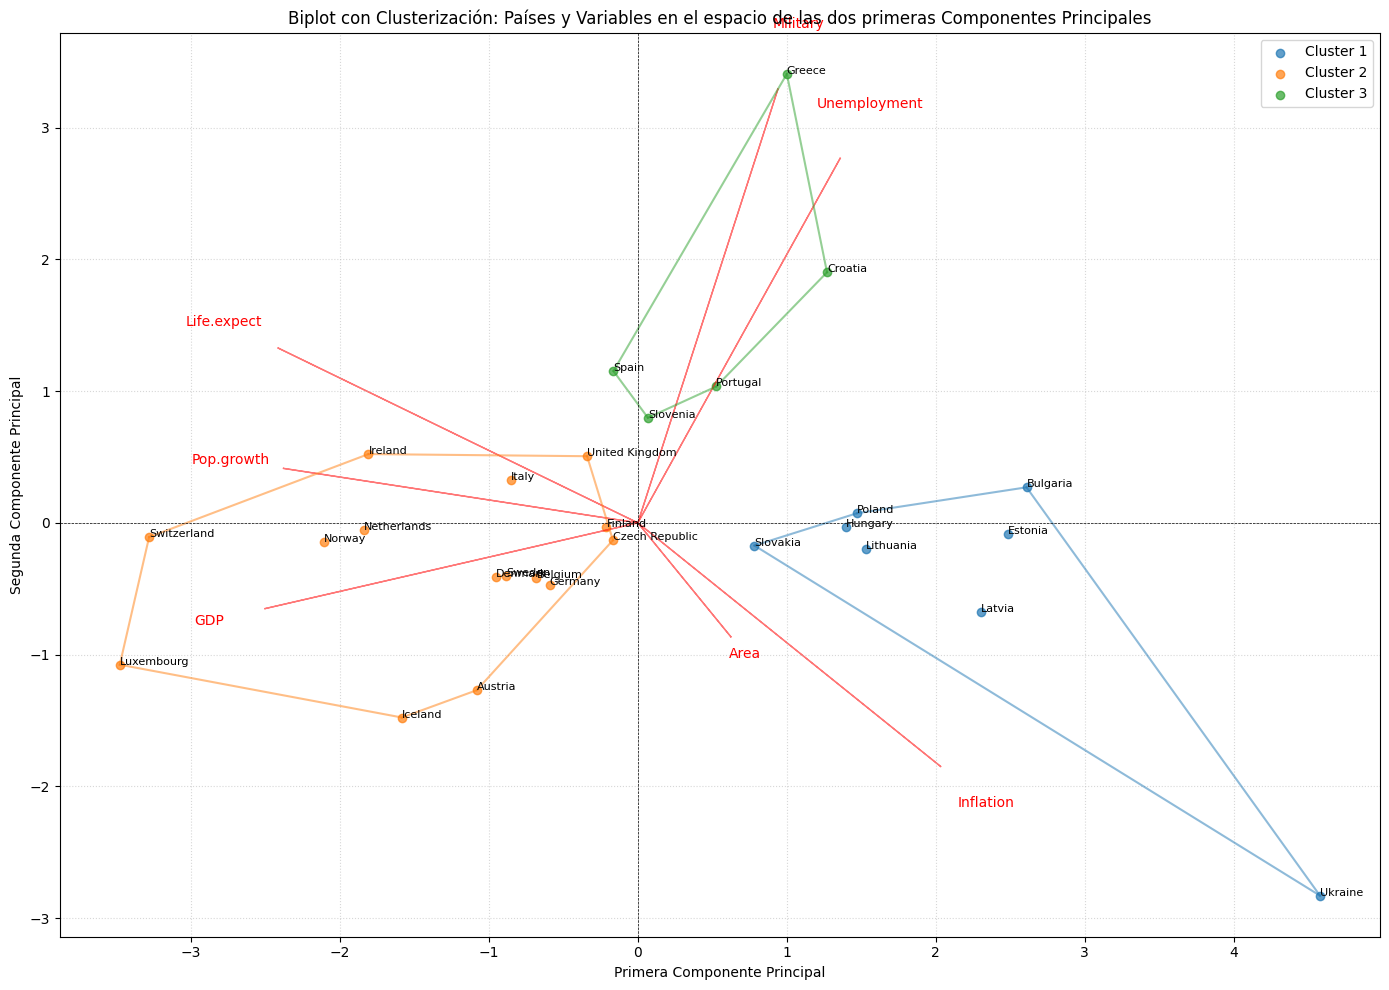


Cluster 1:
Bulgaria, Estonia, Hungary, Latvia, Lithuania, Poland, Slovakia, Ukraine

Cluster 2:
Austria, Belgium, Czech Republic, Denmark, Finland, Germany, Iceland, Ireland, Italy, Luxembourg, Netherlands, Norway, Sweden, Switzerland, United Kingdom

Cluster 3:
Croatia, Greece, Portugal, Slovenia, Spain


In [ ]:
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans

# Realizamos la clusterización con K-means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(Y[:, :2])  # Usamos las dos primeras componentes principales

# Creamos un nuevo gráfico con los clusters
plt.figure(figsize=(14, 10))

# Definimos una paleta de colores para los clusters
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Dibujamos los puntos con colores según el cluster
for i in range(n_clusters):
    cluster_points = Y[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}', alpha=0.7)

# Dibujamos los contornos de los clusters
for i in range(n_clusters):
    cluster_points = Y[cluster_labels == i, :2]
    if len(cluster_points) >= 3:  # Necesitamos al menos 3 puntos para formar un polígono
        hull = ConvexHull(cluster_points)
        for simplex in hull.simplices:
            plt.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], c=colors[i], alpha=0.5)

# Añadimos las etiquetas de los países
for i, country in enumerate(data['Country']):
    plt.annotate(country, (Y[i, 0], Y[i, 1]), fontsize=8)

# Añadimos los vectores de las variables
scalef = 5  # Factor de escala para hacer los vectores más visibles
numeric_columns = ['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']
for i, col in enumerate(numeric_columns):
    plt.arrow(0, 0, V[i, 0]*scalef, V[i, 1]*scalef, color='r', alpha=0.5)
    plt.text(V[i, 0]*scalef*1.15, V[i, 1]*scalef*1.15, col, color='r', ha='center', va='center')

plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Biplot con Clusterización: Países y Variables en el espacio de las dos primeras Componentes Principales')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Imprimimos los países en cada cluster
for i in range(n_clusters):
    print(f"\nCluster {i+1}:")
    print(", ".join(data['Country'][cluster_labels == i]))

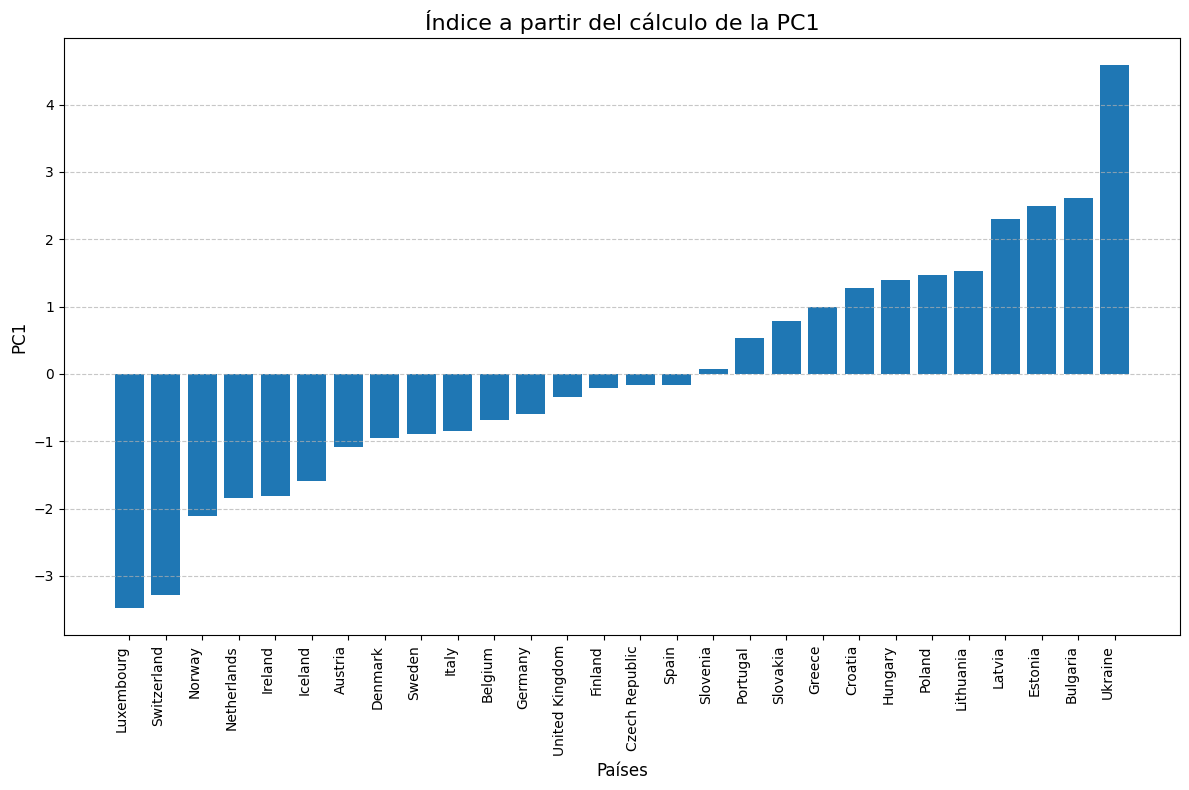

Índice PC1 por país:
       Country       PC1
    Luxembourg -3.478435
   Switzerland -3.281586
        Norway -2.106511
   Netherlands -1.840053
       Ireland -1.808918
       Iceland -1.583720
       Austria -1.081748
       Denmark -0.955191
        Sweden -0.885105
         Italy -0.853224
       Belgium -0.681094
       Germany -0.592394
United Kingdom -0.340819
       Finland -0.210563
Czech Republic -0.167209
         Spain -0.163767
      Slovenia  0.067543
      Portugal  0.526493
      Slovakia  0.782966
        Greece  1.000472
       Croatia  1.270149
       Hungary  1.396898
        Poland  1.471774
     Lithuania  1.530100
        Latvia  2.306059
       Estonia  2.487735
      Bulgaria  2.609879
       Ukraine  4.580268


In [ ]:
# Creamos un DataFrame con los países y sus valores de PC1
pc1_index = pd.DataFrame({
    'Country': data['Country'],
    'PC1': Y[:, 0]
})

# Ordenamos los países por el valor de PC1
pc1_index = pc1_index.sort_values('PC1', ascending=True)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(pc1_index['Country'], pc1_index['PC1'])

# Personalizamos el gráfico
plt.title('Índice a partir del cálculo de la PC1', fontsize=16)
plt.xlabel('Países', fontsize=12)
plt.ylabel('PC1', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustamos el diseño para que se vea bien
plt.tight_layout()

# Mostramos el gráfico
plt.show()

# Imprimimos los valores del índice PC1 para cada país
print("Índice PC1 por país:")
print(pc1_index.to_string(index=False))